# Eksploracja i wykresy

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

Pokażemy jak eksplorować dane, tworzyć różne rodzaje wykresów oraz przygotować je do regresji liniowej.

[SkillCraft - zbiór danych](http://summit.sfu.ca/item/13328 ) graczy z rozgrywek w strategię czasu rzeczywistego  [StarCraft 2](https://en.wikipedia.org/wiki/StarCraft_II:_Wings_of_Liberty), związanych a artykułem:

* Thompson JJ, Blair MR, Chen L, Henrey AJ (2013) [Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning.](http://dx.doi.org/10.1371/journal.pone.0075129) PLoS ONE 8(9): e75129.

Skrótowe infromacje w [tym archiwum](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset), w szczególności opis zmiennych (przedstawiamy wybrane):

> * `2.` LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal) 
* `3.` Age: Age of each player (integer) 
* `4.` HoursPerWeek: Reported hours spent playing per week (integer) 
* `5.` TotalHours: Reported total hours spent playing (integer) 
* `6.` APM: Action per minute (continuous) 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# wczytujemy dane; brakujące dane są oznaczone symbolem "?"
df = pd.read_csv("../dane/SkillCraft1_Dataset.csv", na_values=["?"])

In [3]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019


In [4]:
df.groupby("LeagueIndex").size()
# lub podobnie:
# df["LeagueIndex"].value_counts().sort_index()

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

In [5]:
# zobaczmy nieliczne grupy: 7
df[df.LeagueIndex == 7].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
104,357,7,21,24,1000,286.4538,0.017852,0.000717,6,0.000049,0.001298,0.006206,20.4232,30.9801,5.7171,30,0.001372,6,0.000000,0.000000
119,398,7,24,16,1250,216.6852,0.011957,0.000396,6,0.000528,0.000839,0.005691,21.6119,32.6225,5.0083,33,0.000688,8,0.000038,0.000000
320,953,7,25,42,2400,182.6208,0.005607,0.000310,8,0.000203,0.000662,0.005254,24.4969,38.6260,5.4065,18,0.001164,7,0.000000,0.000000
368,1096,7,19,56,1700,130.8600,0.003419,0.000552,5,0.000104,0.000069,0.003108,18.7416,52.3111,6.6667,15,0.000932,5,0.000000,0.000000


In [6]:
# zobaczmy nieliczne grupy: 7
df[df.LeagueIndex == 8].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0


In [7]:
# zatem brakuje niektórych danych, takich jak wiek i liczba godzin jakie grają
# zobaczmy, czy to tylko sprawa
df[df.LeagueIndex == 8].count()

GameID                  55
LeagueIndex             55
Age                      0
HoursPerWeek             0
TotalHours               0
APM                     55
SelectByHotkeys         55
AssignToHotkeys         55
UniqueHotkeys           55
MinimapAttacks          55
MinimapRightClicks      55
NumberOfPACs            55
GapBetweenPACs          55
ActionLatency           55
ActionsInPAC            55
TotalMapExplored        55
WorkersMade             55
UniqueUnitsMade         55
ComplexUnitsMade        55
ComplexAbilitiesUsed    55
dtype: int64

In [8]:
# zatem ograniczamy się z analizą lig prócz ostatniej
df = df[df.LeagueIndex < 8]

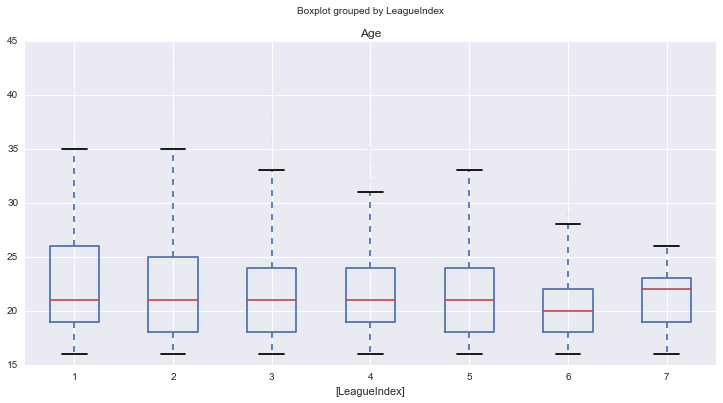

In [9]:
# boxplot: 'Age', grupowany po  'LeagueIndex'
df[["LeagueIndex","Age"]].boxplot(by="LeagueIndex", figsize=(12,6))

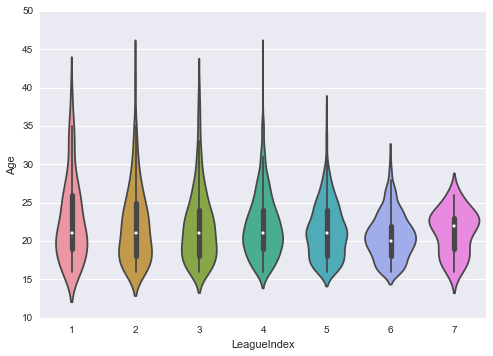

In [45]:
# albo to samo przy pomocy tzw. Violin plot
sns.violinplot(x="LeagueIndex", y="Age", data=df, order=[1, 2, 3, 4, 5, 6, 7])

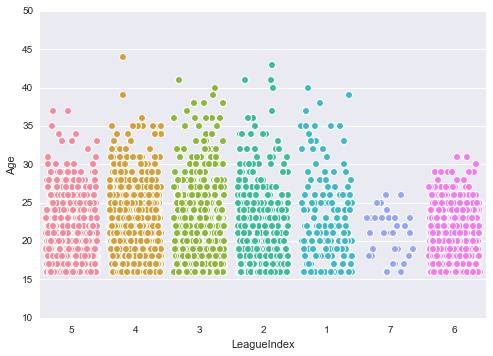

In [57]:
sns.stripplot(x="LeagueIndex", y="Age", data=df, jitter=0.4)

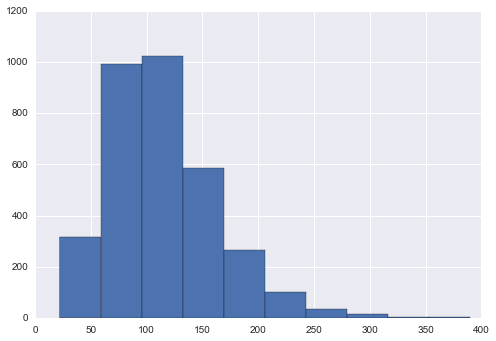

In [12]:
# histogram APM
df['APM'].hist()

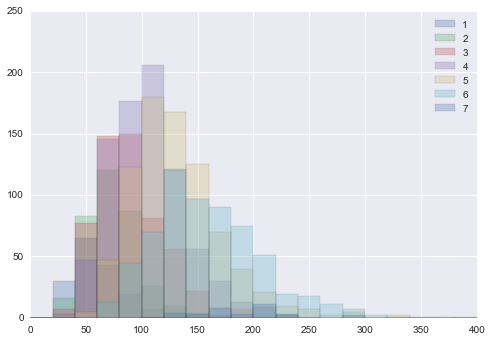

In [44]:
for nr_ligi, gracze in df.groupby("LeagueIndex")['APM']:
    gracze.hist(range=(0, 400), bins=20, alpha=0.3, label=str(nr_ligi))
plt.legend(loc="upper right")

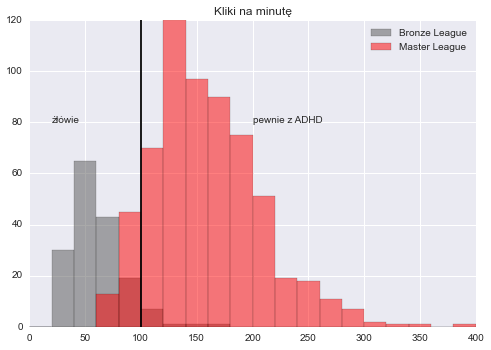

In [61]:
kolorki = {1: "#555555", 6: "#ff0000"}
nazwa_ligi = {1: "Bronze League", 6: "Master League"}

for nr_ligi, gracze in df.query("LeagueIndex in [1,6]").groupby("LeagueIndex")['APM']:
    gracze.hist(range=(0, 400), bins=20, alpha=0.5, label=nazwa_ligi[nr_ligi], color=kolorki[nr_ligi])
    
plt.legend(loc="upper right")  # legenda z opcją gdzie
plt.title("Kliki na minutę")  # tytuł
plt.vlines(100, 0, 120)  # linia pionowa
plt.text(20, 80, "żłówie")  # tekst
plt.text(200, 80, "pewnie z ADHD")  # tekst

In [70]:
# w celu eksploracji zależności wieloczynnikowych zobaczmy medianę wieku
df["Age"].median()

21.0

In [21]:
# oraz godzin w tygodniu
df["HoursPerWeek"].median()

12.0

In [25]:
# tworzenie zmiennych binarnych
df["mlody"] = df["Age"] < df["Age"].median()
df["maniacy"] = df["HoursPerWeek"] > df["HoursPerWeek"].median()

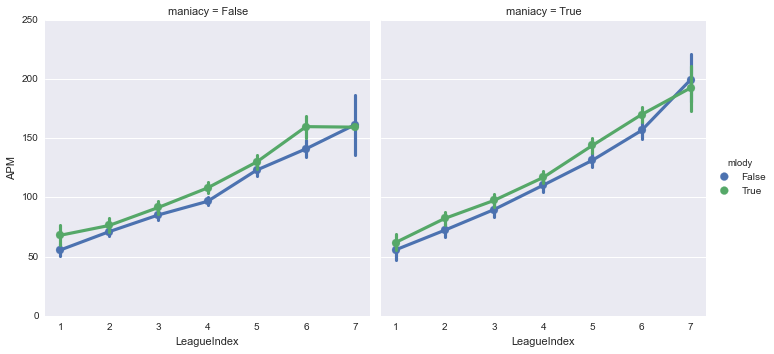

In [62]:
sns.factorplot("LeagueIndex", "APM", data=df, hue="mlody", col="maniacy",
               kind="point")

In [81]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,mlody,maniacy
count,3305.000000,3305.000000,3305.000000,3304.000000,3303.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,...,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305,3305
mean,4718.986989,4.090772,21.652950,15.743341,953.845595,113.777963,0.003967,0.000360,4.289561,0.000091,...,40.901643,64.458945,5.266766,22.057186,0.001029,6.535552,0.000060,0.000141,0.4499244,0.4623298
std,2655.043173,1.424743,4.218278,11.729187,17408.749363,47.546823,0.004690,0.000206,2.324981,0.000155,...,17.033924,18.961527,1.504577,7.408934,0.000518,1.857847,0.000111,0.000260,0.4975614,0.4986544
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000,False,False
25%,2430.000000,3.000000,19.000000,8.000000,300.000000,78.873600,0.001238,0.000201,3.000000,0.000000,...,29.536900,51.285300,4.258500,17.000000,0.000681,5.000000,0.000000,0.000000,0,0
50%,4789.000000,4.000000,21.000000,12.000000,500.000000,106.621800,0.002401,0.000347,4.000000,0.000038,...,37.268800,61.445300,5.084500,22.000000,0.000903,6.000000,0.000000,0.000020,0,0
75%,6993.000000,5.000000,24.000000,20.000000,800.000000,139.340400,0.004825,0.000491,6.000000,0.000110,...,48.650000,74.216200,6.026000,27.000000,0.001257,8.000000,0.000087,0.000180,1,1
max,9271.000000,6.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,...,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084,True,True


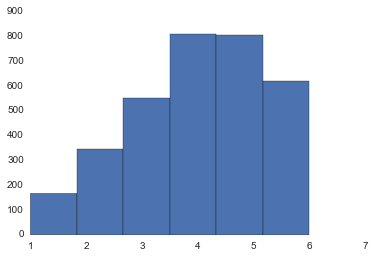

In [87]:
# wyższa liga, lepiej
df["LeagueIndex"].hist(bins=6)

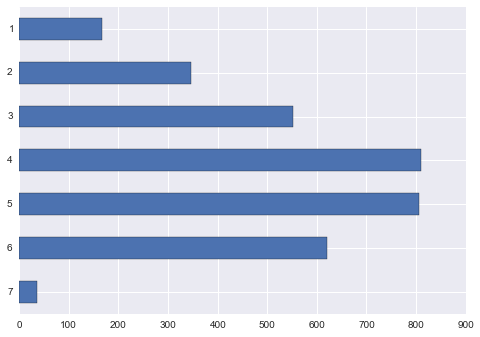

In [63]:
df["LeagueIndex"].value_counts().sort_index(ascending=False).plot(kind='barh')

In [64]:
# dla uproszczenia analizy ograniczmy się tylko do części kolumn
df_some = df.loc[:,"LeagueIndex":"APM"]

In [65]:
# zobaczmy jak to wygląda
df_some.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
0,5,27,10,3000,143.7180
1,5,23,10,5000,129.2322
2,4,30,10,200,69.9612
3,3,19,20,400,107.6016
4,3,32,10,500,122.8908


In [66]:
# absurdlanie wysoki HoursPlayed
#df_some = df_some.drop(1793)

In [67]:
# korelacja Pearsona pomiędzy miennymi (tj. liniowa korelacja)
df_some.corr()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.127825,0.217976,0.023884,0.624037
Age,-0.127825,1.000000,-0.184508,-0.016630,-0.210559
HoursPerWeek,0.217976,-0.184508,1.000000,0.024306,0.246844
TotalHours,0.023884,-0.016630,0.024306,1.000000,0.072850
APM,0.624037,-0.210559,0.246844,0.072850,1.000000


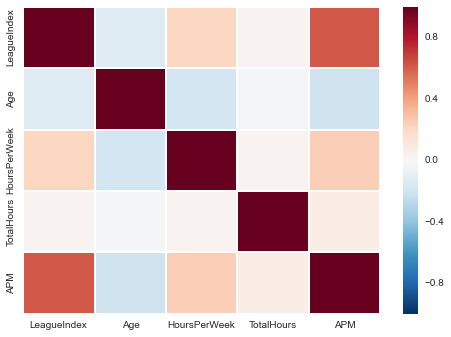

In [68]:
# i jako wykres:
sns.heatmap(df_some.corr())

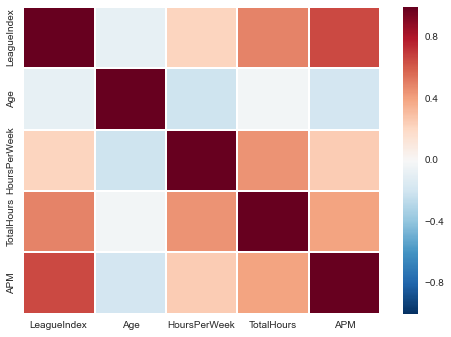

In [69]:
# i podobnie korelacja Spearmana (rankingowa korelacja)
sns.heatmap(df_some.corr(method='spearman'))

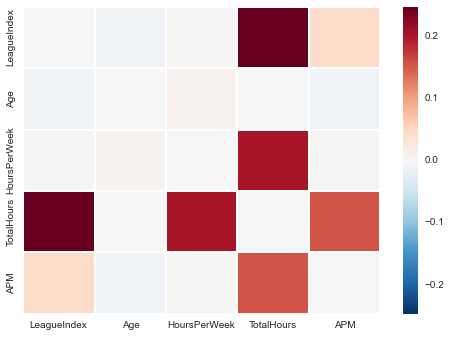

In [70]:
# możemy też wykreślić różnicę ich kwadratów
sns.heatmap(df_some.corr(method='spearman')**2 - df_some.corr(method='pearson')**2)

/usr/local/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


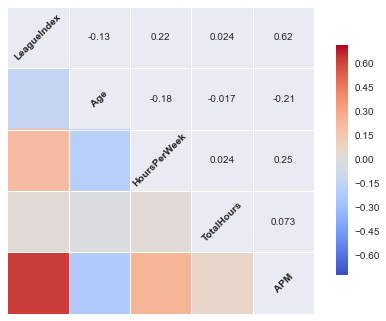

In [71]:
# istnieje też bezpośrednia metoda to tworzenia wykresów korelacji
sns.corrplot(df_some)

In [72]:
for col in df_some:
    print(col)

LeagueIndex
Age
HoursPerWeek
TotalHours
APM


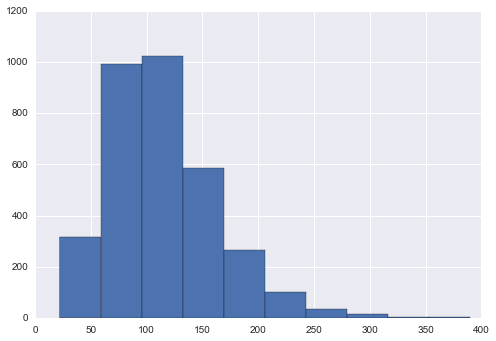

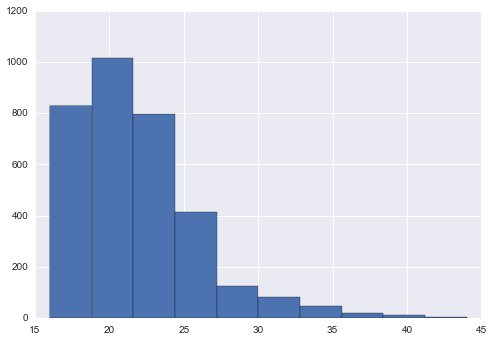

In [73]:
df_some["APM"].hist()
plt.show()
df_some["Age"].hist()
# plt.show()

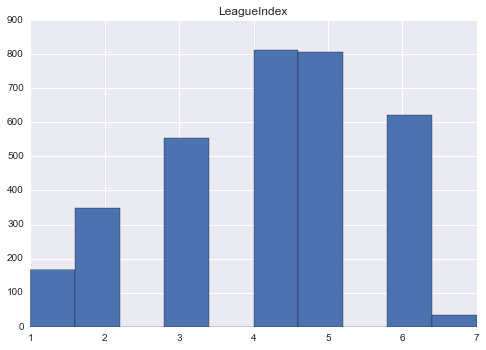

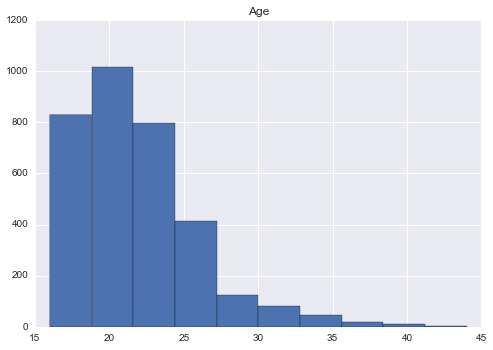

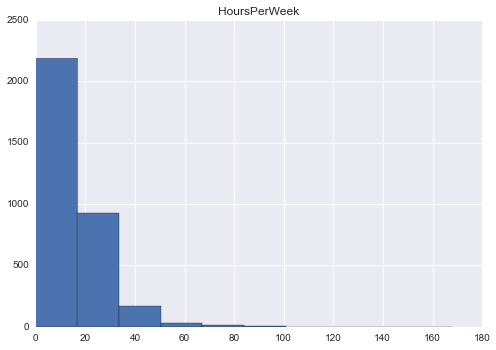

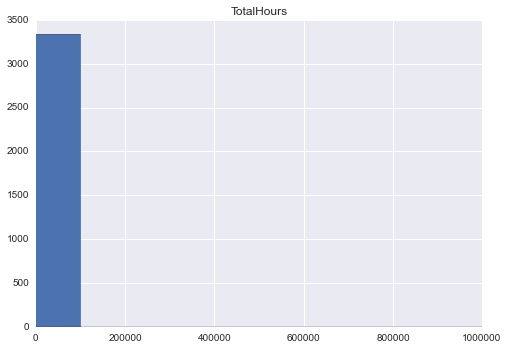

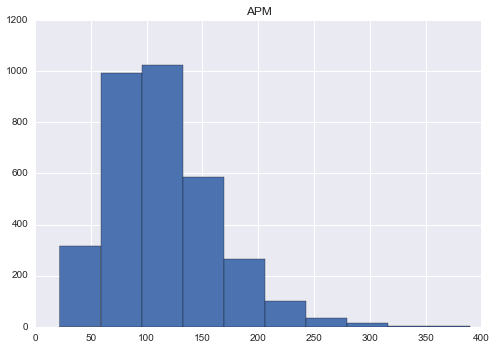

In [74]:
for col in df_some:
    df_some[col].hist()
    plt.title(col)
    plt.show()

In [75]:
# gdyby najgorliwszy gracz 
df_some["TotalHours"].max() / (24 * 365)

114.15525114155251

In [76]:
df_some[df_some["TotalHours"] == 1000000]

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
1793,5,18,24,1000000,281.4246


In [114]:
# mozna wyrzucic ten wpis:
# df_some = df_some.drop(1793)
# ale bezpieczniej i sensowniej

In [115]:
df_some["TotalHours"].max()

25000.0

In [116]:
25000 / (16 * 365)

4.280821917808219

In [ ]:
# "SelfReported"

In [134]:
df_przeskalowane = df_some.query("HoursPerWeek > 0")[["LeagueIndex"]].copy()
for col in df_some.columns[1:]:
    df_przeskalowane[col + "_log10"] = np.log10(df_some[col])

In [135]:
df_przeskalowane.head()

,LeagueIndex,Age_log10,HoursPerWeek_log10,TotalHours_log10,APM_log10
0,5,1.431364,1.00000,3.477121,2.157511
1,5,1.361728,1.00000,3.698970,2.111371
2,4,1.477121,1.00000,2.301030,1.844857
3,3,1.278754,1.30103,2.602060,2.031819
4,3,1.505150,1.00000,2.698970,2.089519


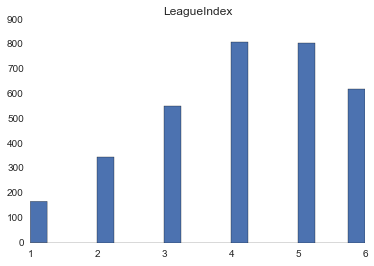

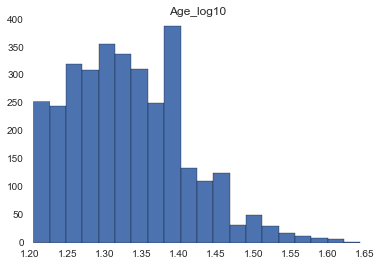

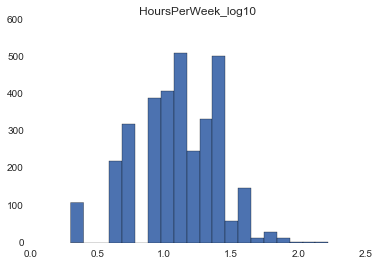

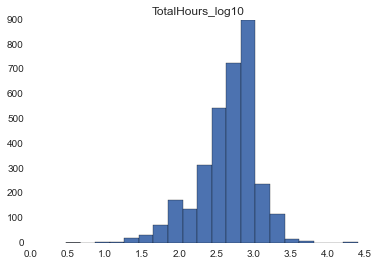

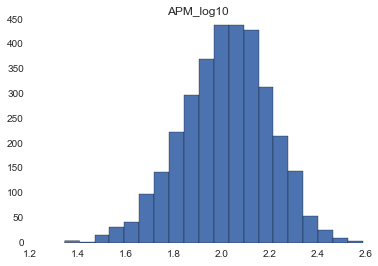

In [137]:
# Wydaje sie, ze dla wszystkiego procz ligii lepsza bylaby skala logarytmiczna
for col in df_przeskalowane:
    df_przeskalowane[col].hist(bins=20)
    plt.title(col)
    plt.show()

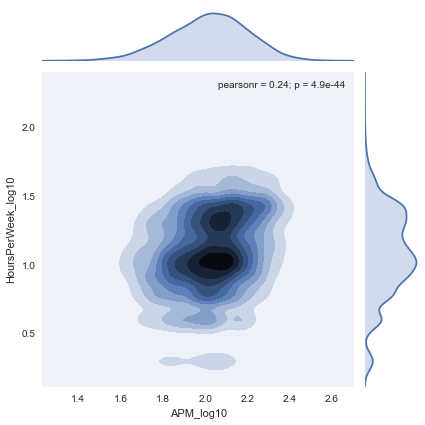

In [147]:
sns.jointplot(x="APM_log10", y="HoursPerWeek_log10",
              data=df_przeskalowane, kind="kde")

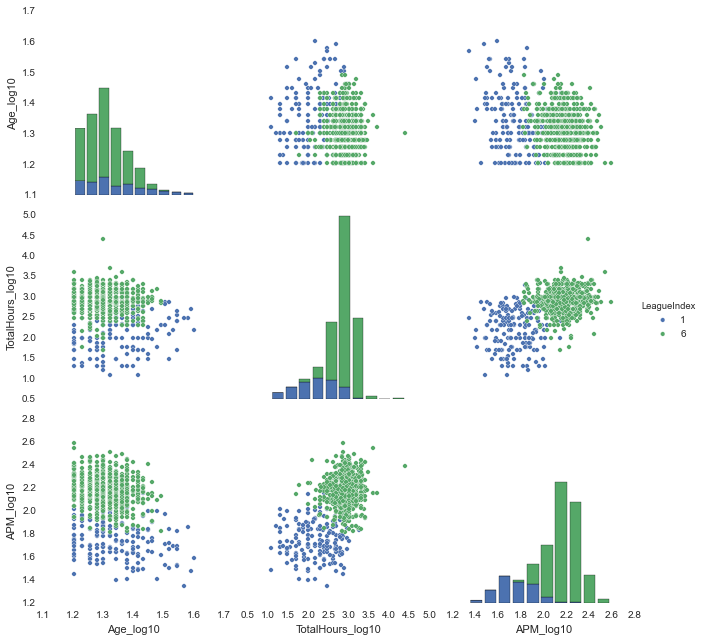

In [162]:
sns.pairplot(df_przeskalowane.query("LeagueIndex in [1,6]"),
             hue="LeagueIndex",
             vars=['Age_log10', 'TotalHours_log10', 'APM_log10'])

/usr/local/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


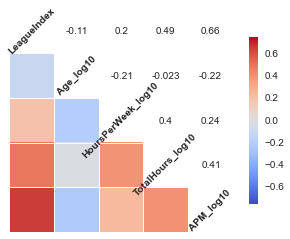

In [159]:
# spójrzmy teraz na przeskalowane zmienne
sns.corrplot(df_przeskalowane)

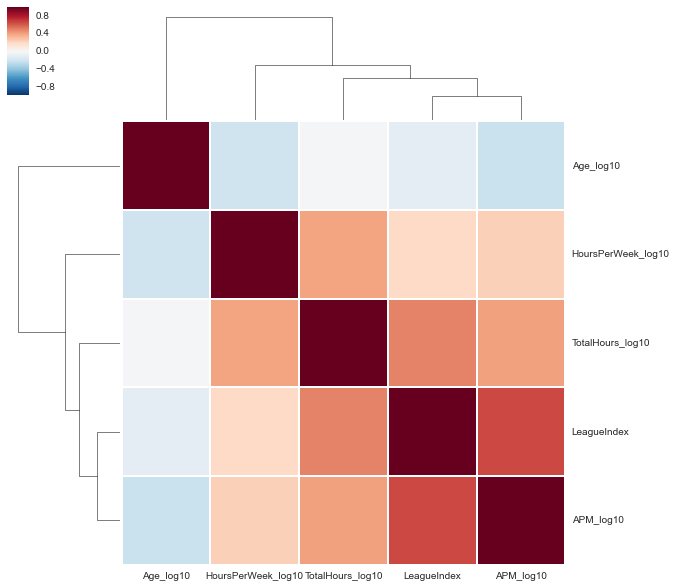

In [160]:
# ciekawym rozwiązaniem jest clustermap, który grupuje podobne zmienne
sns.clustermap(df_przeskalowane.corr())